In [1]:
try:
    import google.colab  # noqa: F401

    # specify the version of DataEval (==X.XX.X) for versions other than the latest
    %pip install -q dataeval[all] maite-datasets
except Exception:
    pass

In [2]:
from maite_datasets.image_classification import CIFAR10

from dataeval.core import calculate
from dataeval.core.flags import ImageStats
from dataeval.data import Metadata, Select
from dataeval.data.selections import Limit, Shuffle
from dataeval.evaluators.bias import balance, diversity, parity

In [3]:
# Load in the CIFAR10 dataset and limit to 20,000 images with random shuffling
cifar10 = Select(CIFAR10("data", image_set="base", download=True), [Limit(20000), Shuffle(seed=0)])
print(cifar10)

Select Dataset
--------------
    Selections: [Limit(size=20000), Shuffle(seed=0)]
    Selected Size: 20000

CIFAR10 Dataset
---------------
    Transforms: []
    Image Set: base
    Metadata: {'id': 'CIFAR10_base', 'index2label': {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}, 'split': 'base'}
    Path: /builds/jatic/aria/dataeval/docs/source/notebooks/data/cifar10
    Size: 60000


In [4]:
metadata = Metadata(cifar10)
print(f"Factor names: {metadata.factor_names}")

Processing datum metadata:   0%|          | 0/20000 [00:00<?, ?it/s]

Factor names: ['id', 'batch_num']


In [5]:
# Balance at index 0 is always class
balance(metadata).balance[1]

np.float64(0.0004117466323785233)

In [6]:
# Calculate pixel and visual statistics
calc_results = calculate(cifar10, stats=ImageStats.PIXEL | ImageStats.VISUAL)

# Append the factors to the metadata
metadata.add_factors(calc_results["stats"])

Processing images for PixelStat, VisualStat:   0%|          | 0/20000 [00:00<?, ?it/s]

In [7]:
# Exclude the batch_num as it is not a relevant factor for bias analysis
metadata.exclude = ["batch_num"]

# Provide binning for the continuous statistical factors using 10 uniform-width bins for each factor
keys = ("mean", "std", "var", "skew", "kurtosis", "entropy", "brightness", "darkness", "sharpness", "contrast", "zeros")
metadata.continuous_factor_bins = dict.fromkeys(keys, 10)

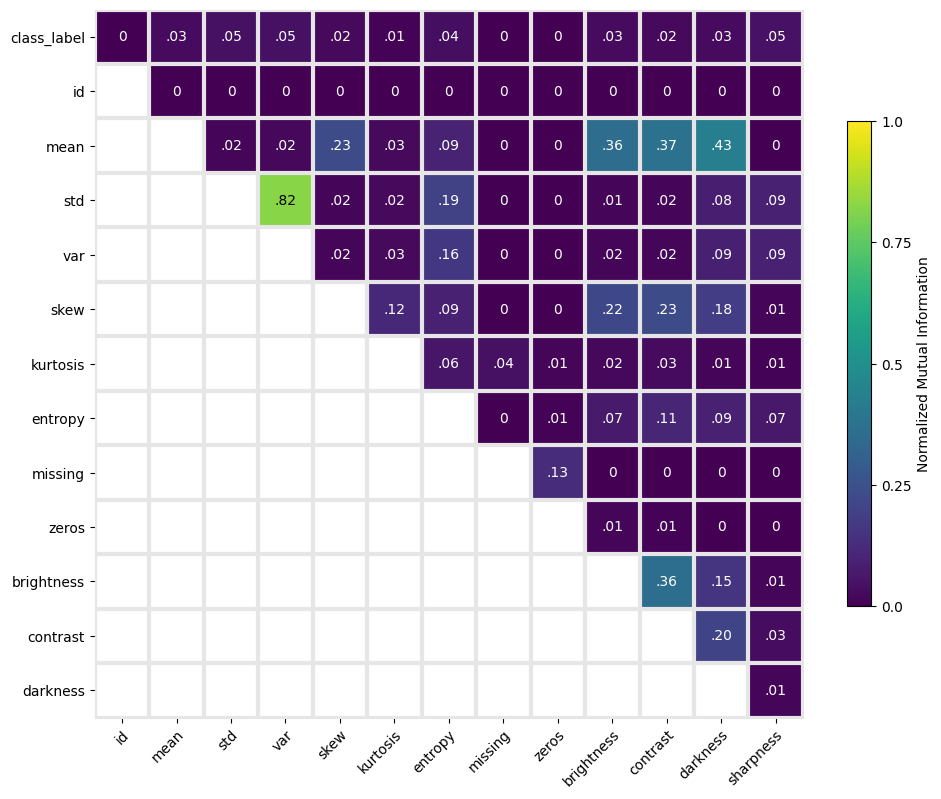

In [8]:
balance_output = balance(metadata)
_ = balance_output.plot()

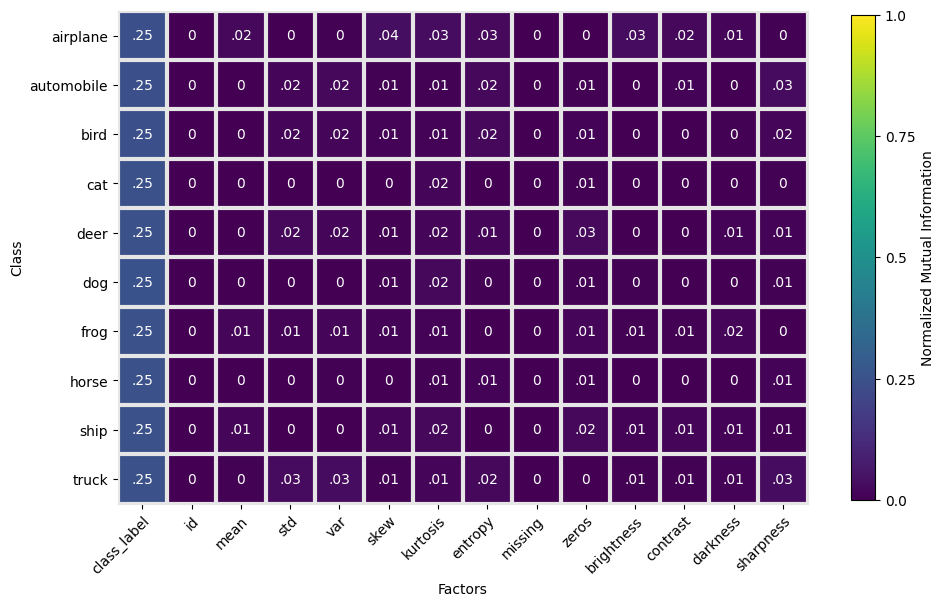

In [9]:
_ = balance_output.plot(plot_classwise=True)

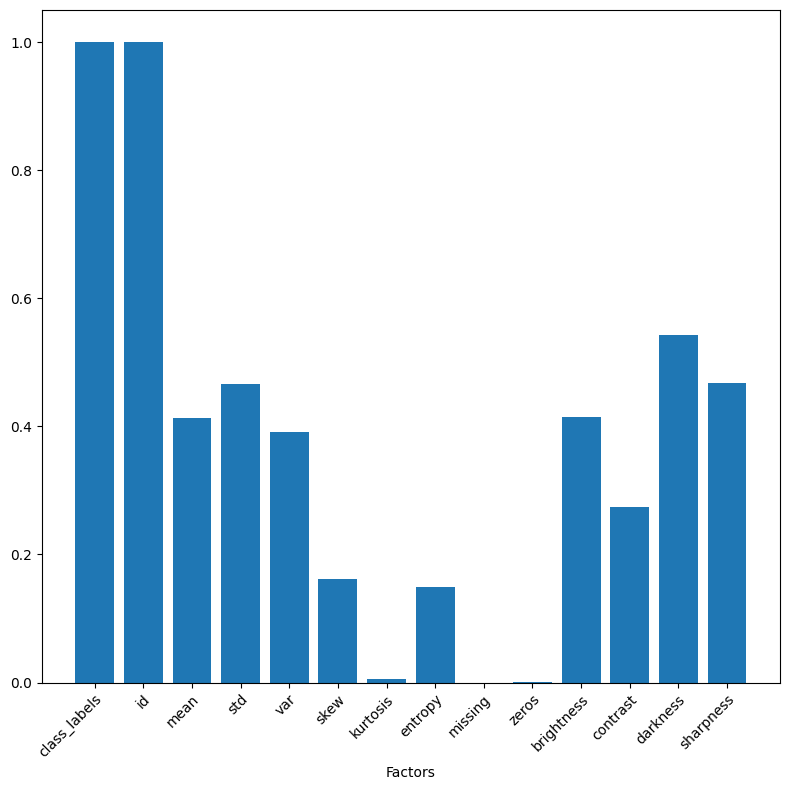

In [10]:
diversity_output = diversity(metadata)
_ = diversity_output.plot()

In [11]:
parity_output = parity(metadata)
parity_output.to_dataframe()

,factor_name,chi_square_score,p_value
0,id,180000.000000,4.935728e-01
1,mean,2676.545577,0.000000e+00
2,std,3777.536769,0.000000e+00
3,var,3623.479274,0.000000e+00
4,skew,1921.952600,0.000000e+00
5,kurtosis,541.965651,2.364298e-69
6,entropy,2811.579356,0.000000e+00
7,missing,0.000000,1.000000e+00
8,zeros,105.835268,5.810960e-03
9,brightness,2823.677685,0.000000e+00
